<a href="https://colab.research.google.com/github/jnramirezg/mecanica_de_solidos/blob/main/codigo/20-(4_3_3)-alter-ley_hooke_isotropos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20. Ley de Hooke generalizada para materiales isótropos (alternativa)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-10-24 | Creando código|

A partir de las ecuaciones:

$\varepsilon_x = \displaystyle\frac{1}{E}\left(\sigma_x- \nu(\sigma_y+\sigma_z)\right)$ (<font color='blue'>1</font>)

$\varepsilon_y = \displaystyle\frac{1}{E}\left(\sigma_y- \nu(\sigma_x+\sigma_z)\right)$ (<font color='blue'>2</font>)

$\varepsilon_z = \displaystyle\frac{1}{E}\left(\sigma_z- \nu(\sigma_x+\sigma_y)\right)$ (<font color='blue'>3</font>)

$\gamma_{xy}=\displaystyle\frac{1}{G}\tau_{xy}$ (<font color='blue'>4</font>)

$\gamma_{xz}=\displaystyle\frac{1}{G}\tau_{xz}$ (<font color='blue'>5</font>)

$\gamma_{yz}=\displaystyle\frac{1}{G}\tau_{yz}$ (<font color='blue'>6</font>)

Importamos las funciones de librería simbólica ```sympy```:

In [1]:
from sympy import *
init_printing()

Definimos en escritura $\LaTeX$ nuestras variables simbólicas:
- ```sx```, ```sy```, ```sz``` representan los esfuerzos axiales $\sigma_x$, $\sigma_y$, $\sigma_z$
- ```txy```, ```txz```, ```tyz``` representan los esfuerzos cortantes $\tau_{xy}$, $\tau_{xz}$, $\tau_{yz}$
- ```E``` representa el módulo de la elasticidad y ```nu``` representa el coeficiente de Poisson $\nu$.

In [2]:
sx,   sy,  sz = symbols("sigma_x sigma_y sigma_z")
tyz, txz, txy = symbols("tau_yz  tau_xz  tau_xy")
E, nu = symbols("E nu")
sx, sy, sz, tyz, txz, txy, E, nu

Definimos la constante ```G```:

In [3]:
G = E / (2 * (1+nu))

Evaluamos las ecuaciones (<font color='blue'>1</font>), (<font color='blue'>2</font>), (<font color='blue'>3</font>), (<font color='blue'>4</font>), (<font color='blue'>5</font>) y (<font color='blue'>6</font>).

In [4]:
ex = (1/E)*(sx - nu*(sy + sz))
ey = (1/E)*(sy - nu*(sx + sz))
ez = (1/E)*(sz - nu*(sx + sy))
gyz = tyz/G
gxz = txz/G
gxy = txy/G

Extraemos la matriz de conformidad ```S```:

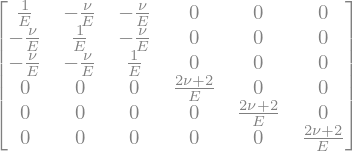

In [5]:
S = linear_eq_to_matrix([ex, ey, ez, gyz, gxz, gxy],
                        [sx, sy, sz, tyz, txz, txy])[0]
S

Calculamos la matriz constitutiva $D=S^{-1}$:

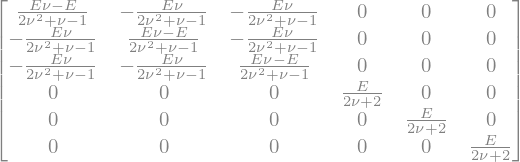

In [6]:
D = S**-1
D

Sacamos factor común $\frac{E}{1+\nu}$ y simplificamos:

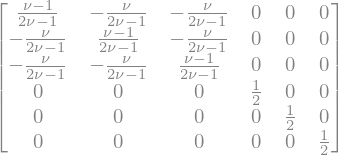

In [7]:
simplify(D/ (E/(1+nu)))

Finalmente, la ley de Hooke generalizada para materiales isótropos en forma matricial es:

$$\underbrace{\left[\begin{matrix} \sigma_x\\ \sigma_y\\ \sigma_z\\ \tau_{yz}\\ \tau_{xz}\\ \tau_{xy}\\\end{matrix}\right]}_{\displaystyle\underline{\sigma}}
=\underbrace{\displaystyle\frac{E}{1+\nu}
\left[\begin{matrix}
\frac{1-\nu}{1-2\nu} & \frac{\nu}{1-2\nu}   &   \frac{\nu}{1-2\nu} &           0 &           0 & 0\\
\frac{\nu}{1-2\nu}   & \frac{1-\nu}{1-2\nu} &   \frac{\nu}{1-2\nu} &           0 &           0 & 0\\
\frac{\nu}{1-2\nu}   & \frac{\nu}{1-2\nu}   & \frac{1-\nu}{1-2\nu} &           0 &           0 & 0\\
                        0 &                         0 &                         0 & \frac{1}{2} &           0 & 0\\
                        0 &                         0 &                         0 &           0 & \frac{1}{2} & 0\\
                        0 &                         0 &                         0 &           0 &           0 & \frac{1}{2}
\end{matrix}\right]}_{\displaystyle\underline{\underline{D}}}
\underbrace{\left[\begin{matrix} \varepsilon_x\\ \varepsilon_y\\ \varepsilon_z\\ \gamma_{yz}\\ \gamma_{xz}\\ \gamma_{xy}\\\end{matrix}\right]}_{\displaystyle\underline{\varepsilon}}$$